<br>
<br>

# `#Lecture:05 Non-Gaussian Distribution:`

<br>
<br>

In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 



<br>

# `#01: QQ-Plot: Quantile-Quantile Plot:`

<br>

**[x,y] where, if we want to check a distribution is normal or not x==normal distribution**

<br>


<Axes: xlabel='sepal_length', ylabel='Density'>

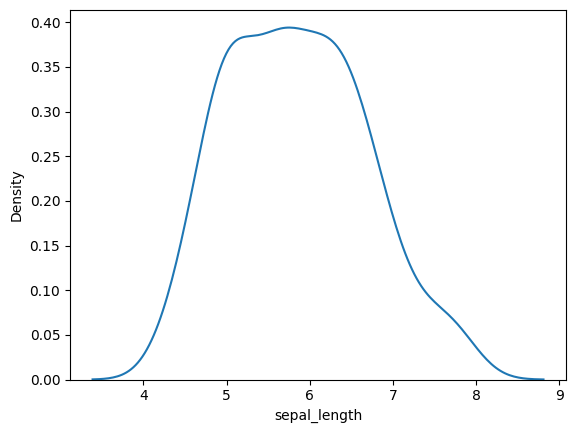

In [6]:

df = sns.load_dataset("iris")
sns.kdeplot(data=df,x='sepal_length')

<Axes: >

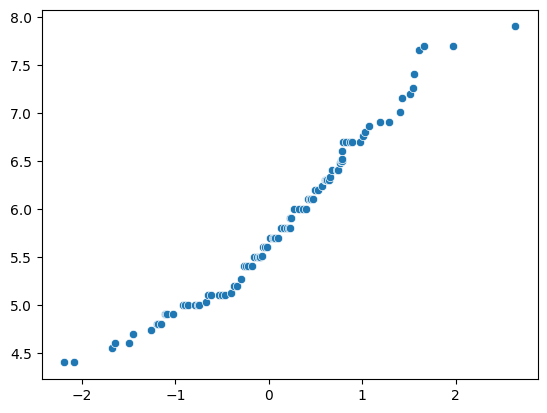

In [8]:
""" 
Process: 
- Sort the value
- Calculate percentile for each sorted value 
- For compare with normal distribution: **we need to make a standard graph**
"""
sort_val = sorted(df["sepal_length"])

y_quardt = []
for i in range(1,101):
    y_quardt.append(np.percentile(a=sort_val,q=i))

x_quardt = []
# loc=mean,scale=stand,size=100
samples = np.random.normal(loc=0,scale=1,size=100) 
for i in range(1,101):
    x_quardt.append(np.percentile(a=samples,q=i))

sns.scatterplot(x=x_quardt,y=y_quardt)


<br>

# `#02: QQ-Plot with statmodel`

<br>

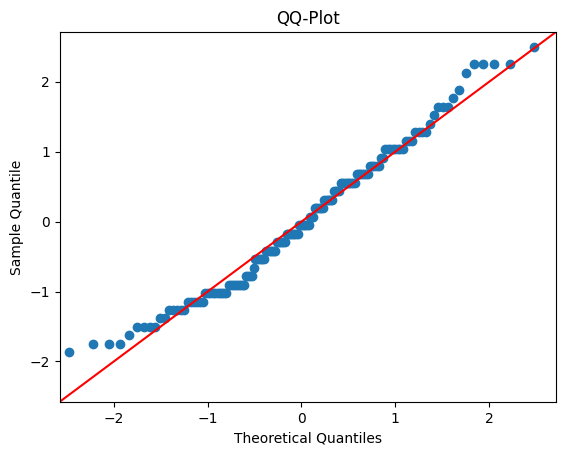

In [20]:
import statsmodels.api as sm 

fig = sm.qqplot(df["sepal_length"],line="45",fit=True)

plt.title("QQ-Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantile")
plt.show()


<br>
<br>

# `#03: a distribution is uniform or not`

<br>
<br>

<Axes: ylabel='Count'>

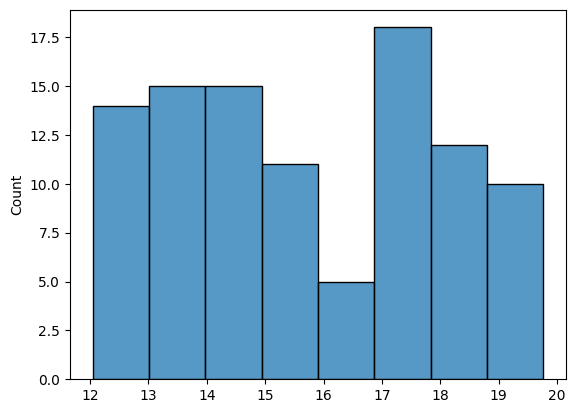

In [24]:


x = np.random.uniform(low=12,high=20,size=100)
sns.histplot(x)


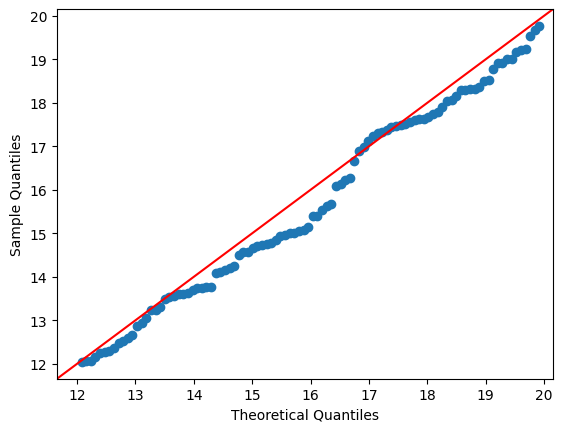

In [30]:
# check:-> To compare, unifrom we need pass an unifrom distribution.
# it will give use error, becuase, statsmodels want data from scipy not numpy.
from scipy.stats import uniform

theotical_dist = np.random.uniform(low=12,high=20,size=100)

# start val: 12, end: 12+8 = 20
theotical_dist = uniform(12,8)

fig = sm.qqplot(x,theotical_dist,line="45")


<br>
<br>

# `#04: Log Normal`

<br>
<br>

lognormal(mean,std)

<br>

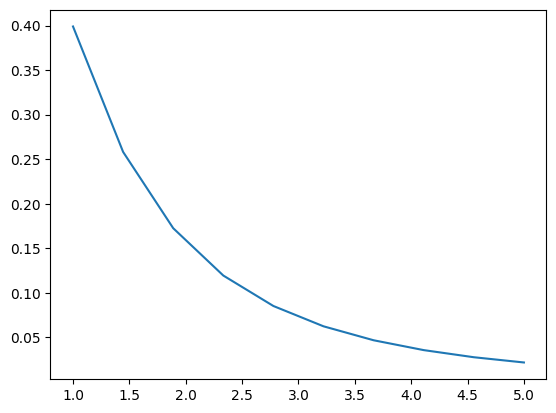

In [86]:
# generating random point from lognormal:
log_normal = np.random.lognormal(mean=0,sigma=5,size=100)

# formula for lognormal:
from scipy.stats import lognorm

x = np.linspace(start=1,stop=5,num=10)

#loc=mean, s=std
y = lognorm.pdf(x=x,loc=0,s=1)

plt.plot(x,y)

<Br>
<Br>

# `#05: Pareto Distribution`

<br>

$f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}$

$Pr(\alpha) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}$

- parameter: $\alpha$

<br>

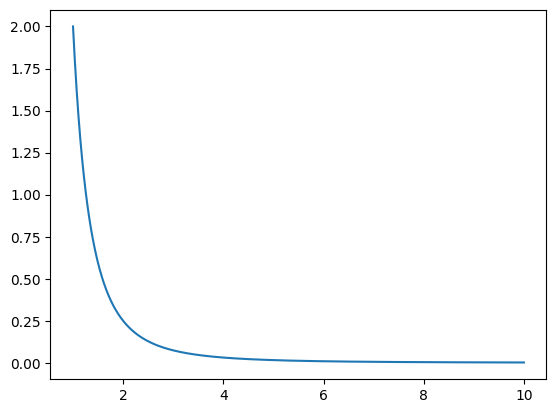

In [ ]:
from scipy.stats import pareto

# generate 100 point from a parito distribution:
parito = np.random.pareto(a=5,size=100)

# for make a pareto distribution we need use scipy:
# calculate the y value for a pareto:
x  = np.linspace(start=1,stop=10,num=1000)

# b = alpha value, will be in y-axis
y = pareto.pdf(x=x,b=2)
plt.plot(x,y)

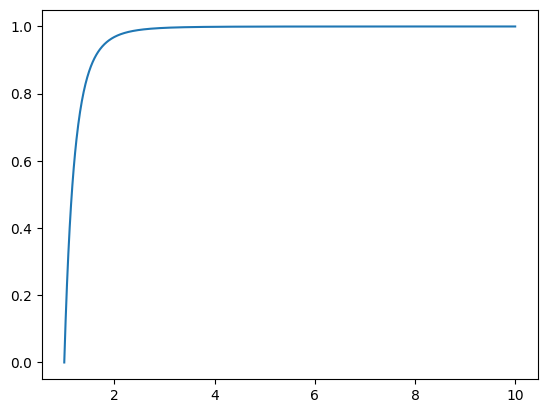

In [67]:

# cdf of parito distribution:
x = np.linspace(start=1,stop=10,num=1000)
y = pareto.cdf(x,b=5)
plt.plot(x,y)

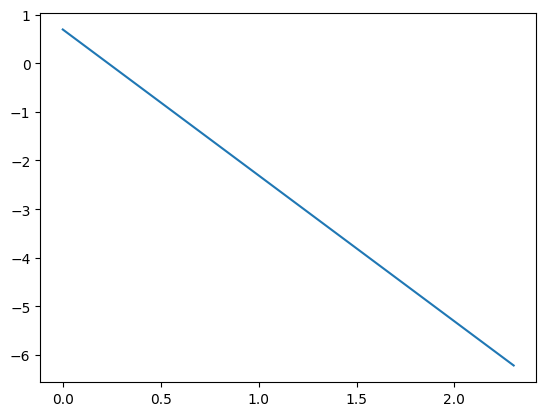

In [88]:

# check a graph is parito or not: 
x  = np.linspace(start=1,stop=10,num=1000)
y = pareto.pdf(x=x,b=2)

new_x = np.log(x)
new_y = np.log(y)

# if -ve slope line then: (it was a pareto distribution)
plt.plot(new_x,new_y)
